In [1]:
from dask.distributed import LocalCluster
cluster = LocalCluster()          # Fully-featured local Dask cluster
client = cluster.get_client()

2025-04-11 09:52:40,114 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle df10aa0f8610676b69bb809dbb9e7b3a initialized by task ('shuffle-transfer-df10aa0f8610676b69bb809dbb9e7b3a', 24) executed on worker tcp://127.0.0.1:57902
2025-04-11 09:52:41,327 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle df10aa0f8610676b69bb809dbb9e7b3a deactivated due to stimulus 'task-finished-1744357961.3269491'


In [2]:
cluster.dashboard_link

'http://127.0.0.1:8787/status'

In [3]:
import dask.dataframe as dd
import dask.bag as db
import json

In [4]:
b = db.read_text('data/*.json').map(json.loads)
b

dask.bag<loads, npartitions=100>

In [5]:
b.take(1)

({'age': 20,
  'name': ['Agustin', 'Malone'],
  'occupation': 'Animal Breeder',
  'telephone': '+1-404-524-9598',
  'address': {'address': '330 Alana Walk', 'city': 'Anderson'},
  'credit-card': {'number': '4005 8000 8648 7485',
   'expiration-date': '11/24'}},)

In [6]:
ddf = b.to_dataframe()
ddf

,age,name,occupation,telephone,address,credit-card
npartitions=100,,,,,,
,int64,object,object,object,object,object
,...,...,...,...,...,...
...,...,...,...,...,...,...
,...,...,...,...,...,...
,...,...,...,...,...,...


In [ ]:
type(ddf)

In [8]:
df = ddf.head(5)
type(df)

pandas.core.frame.DataFrame

In [ ]:
type(df)

In [12]:
ddf.loc[ddf['occupation'] == "Technician"].compute().shape

(893, 6)

In [14]:
ddf.drop("name", axis="columns").groupby('occupation').agg({'age': 'mean'}).compute()

,age
occupation,
Technical Liaison,61.538549
Packaging,60.117780
Brewery Manager,58.050286
Haulage Contractor,60.253165
Soldier,57.692597
...,...
Machine Tool,59.133089
Vehicle Technician,61.667421
Geologist,59.976536


## Dataset partitions

In [16]:
ddf.partitions[0].compute()

,age,name,occupation,telephone,address,credit-card
0,20,"[Agustin, Malone]",Animal Breeder,+1-404-524-9598,"{'address': '330 Alana Walk', 'city': 'Anderson'}","{'number': '4005 8000 8648 7485', 'expiration-..."
1,0,"[Jamar, Ayala]",Technical Liaison,+18179370129,"{'address': '3 Argonaut Viaduct', 'city': 'Laf...","{'number': '3440 726659 51129', 'expiration-da..."
2,69,"[Lanie, Hoover]",Merchant,+1-360-016-7144,"{'address': '579 Tiffany Station', 'city': 'Si...","{'number': '4995 4746 4301 1121', 'expiration-..."
3,2,"[Mendy, Faulkner]",Packaging,+1-975-254-7948,"{'address': '527 Western Shore Walk', 'city': ...","{'number': '4503 9554 4223 9967', 'expiration-..."
4,0,"[Gonzalo, Whitehead]",HGV Driver,+1-627-152-0009,"{'address': '221 Kensington Avenue', 'city': '...","{'number': '4443 5703 2541 3804', 'expiration-..."
...,...,...,...,...,...,...
9995,64,"[Marna, Erickson]",Taxidermist,+18050636340,"{'address': '514 Forest Ferry', 'city': 'Ameri...","{'number': '3733 327339 68727', 'expiration-da..."
9996,46,"[Vincenza, Ratliff]",Library Manager,+13806795258,"{'address': '709 Casitas Place', 'city': 'Merr...","{'number': '5242 4396 0969 9894', 'expiration-..."
9997,17,"[Roberto, Riley]",Hotelier,+1-941-550-0498,{'address': '798 Palace Of Fine Arts Boulevard...,"{'number': '2630 9941 5837 5236', 'expiration-..."
9998,88,"[Sana, Stein]",Technical Co-ordinator,+1-323-929-3873,"{'address': '1115 Brotherhood Walk', 'city': '...","{'number': '3711 837158 95319', 'expiration-da..."


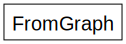

In [17]:
ddf.visualize()

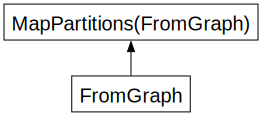

In [20]:
ddf.map_partitions(lambda x: x.size).visualize()

# Read CSVs

In [21]:
from google.cloud import storage

def list_blobs(bucket_name):
    """Lists all the blobs in the bucket."""
    # bucket_name = "your-bucket-name"

    storage_client = storage.Client.create_anonymous_client()

    # Note: Client.list_blobs requires at least package version 1.17.0.
    blobs = storage_client.list_blobs(bucket_name)

    # Note: The call returns a response only when the iterator is consumed.
    for blob in blobs:
        print(blob.name)
list_blobs('anaconda-public-data')

airline/1987.csv
airline/1988.csv
airline/1989.csv
airline/1990.csv
airline/1991.csv
airline/1992.csv
airline/1993.csv
airline/1994.csv
airline/1995.csv
airline/1996.csv
airline/1997.csv
airline/1998.csv
airline/1999.csv
airline/2000.csv
airline/2001.csv
airline/2002.csv
airline/2003.csv
airline/2004.csv
airline/2005.csv
airline/2006.csv
airline/2007.csv
airline/2008.csv
dnscensus2013/dnscensus2013.tar.gz
github-data/
github-data/github-data.tar
iris/iris.csv
nyc-taxi/
nyc-taxi/2015.parquet/_common_metadata
nyc-taxi/2015.parquet/_metadata
nyc-taxi/2015.parquet/part.0.parquet
nyc-taxi/2015.parquet/part.1.parquet
nyc-taxi/2015.parquet/part.10.parquet
nyc-taxi/2015.parquet/part.11.parquet
nyc-taxi/2015.parquet/part.12.parquet
nyc-taxi/2015.parquet/part.13.parquet
nyc-taxi/2015.parquet/part.14.parquet
nyc-taxi/2015.parquet/part.15.parquet
nyc-taxi/2015.parquet/part.16.parquet
nyc-taxi/2015.parquet/part.17.parquet
nyc-taxi/2015.parquet/part.18.parquet
nyc-taxi/2015.parquet/part.19.parquet
n

In [22]:
csv_df = dd.read_csv('gcs://anaconda-public-data/nyc-taxi/csv/2015/green_tripdata_2015-03.csv', 
                 storage_options={'token': 'anon'},
                 dtype={'Tolls_amount': 'float64', 'Trip_type ': 'float64'},
                 parse_dates=['lpep_pickup_datetime', 'Lpep_dropoff_datetime']
                )

In [24]:
csv_df.head()

,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Distance_between_service,Time_between_service,Trip_type
0,2015-03-01 00:02:05,2015-03-01 00:08:01,N,1,-73.961479,40.801872,-73.980721,40.775055,1,2.10,...,0.5,0.5,0.0,0.0,NaN,9.3,1,6.0,307,1.0
1,2015-03-01 00:02:11,2015-03-01 00:27:09,N,1,-73.979759,40.677467,-74.017097,40.710930,1,4.70,...,0.5,0.5,4.0,0.0,NaN,25.3,1,2.0,176,1.0
2,2015-03-01 00:02:07,2015-03-01 00:10:31,N,1,-73.941376,40.833633,-73.926689,40.863411,1,3.09,...,0.5,0.5,0.0,0.0,NaN,12.3,2,7.0,21603,1.0
3,2015-03-01 00:02:13,2015-03-01 00:09:09,N,1,-73.939674,40.821152,-73.931854,40.846458,1,2.20,...,0.5,0.5,0.0,0.0,NaN,9.8,4,1.0,199,1.0
4,2015-03-01 00:02:18,2015-03-01 00:07:52,N,1,-73.957344,40.712959,-73.954796,40.719650,6,0.75,...,0.5,0.5,1.0,0.0,NaN,7.8,1,0.0,2,1.0


In [23]:
csv_df

,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Distance_between_service,Time_between_service,Trip_type
npartitions=4,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],datetime64[ns],string,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
